In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/exchange_rate.csv")
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [ ]:
df.set_index('date', inplace=True)

In [6]:
import matplotlib.pyplot as plt

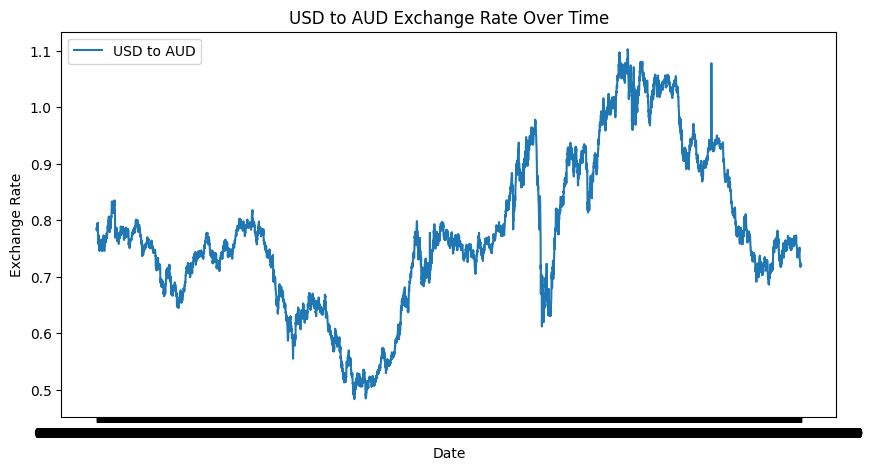

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(df['Ex_rate'], label='USD to AUD')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [ ]:
print(df.isnull().sum())

df.fillna(method='ffill', inplace=True)

print(df.isnull().sum())

Ex_rate    0
dtype: int64
Ex_rate    0
dtype: int64


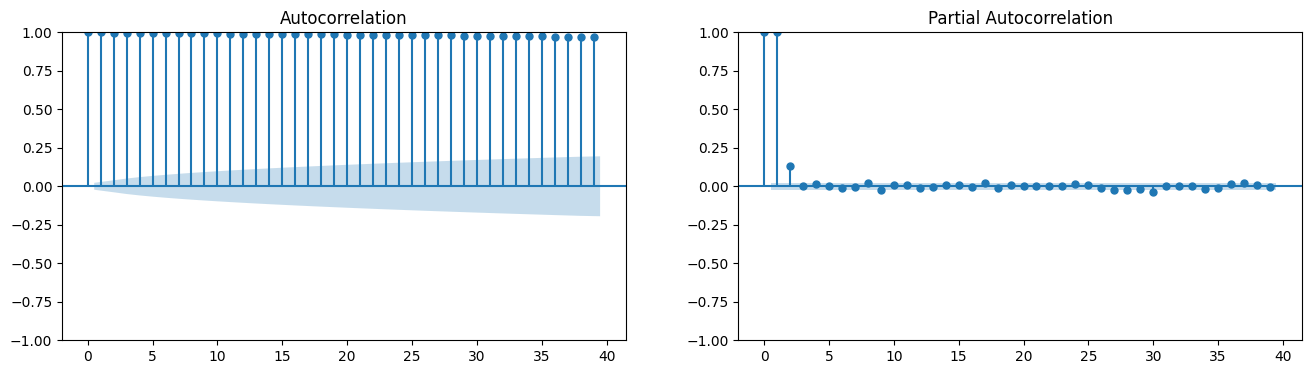

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(df['Ex_rate'], ax=axes[0])
plot_pacf(df['Ex_rate'], ax=axes[1])
plt.show()

In [10]:
from statsmodels.tsa.arima.model import ARIMA
p = 1
d = 1
q = 1
model_arima = ARIMA(df['Ex_rate'], order=(p, d, q))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Wed, 03 Jul 2024   AIC                         -56102.322
Time:                        10:53:49   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

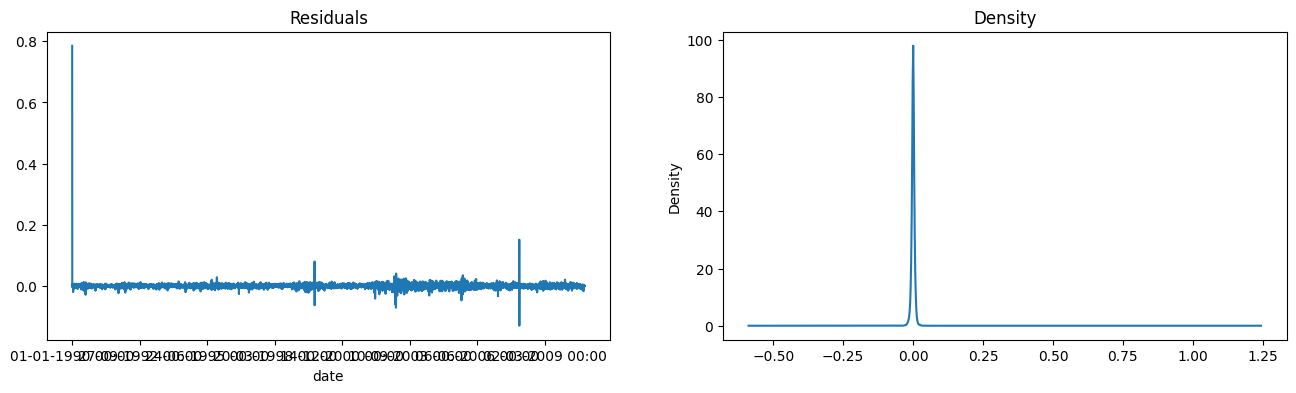

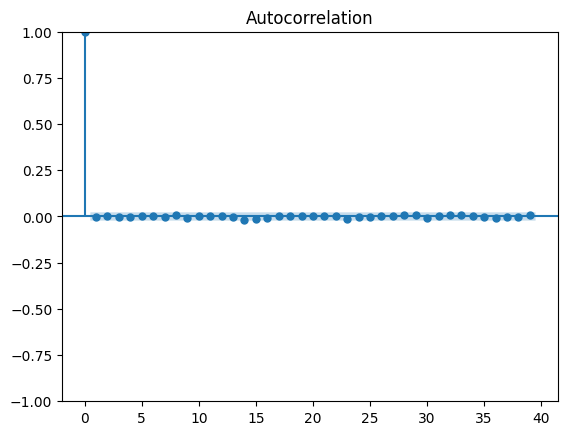

In [11]:
residuals = model_arima_fit.resid
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
residuals.plot(title="Residuals", ax=axes[0])
residuals.plot(kind='kde', title='Density', ax=axes[1])
plt.show()
plot_acf(residuals)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


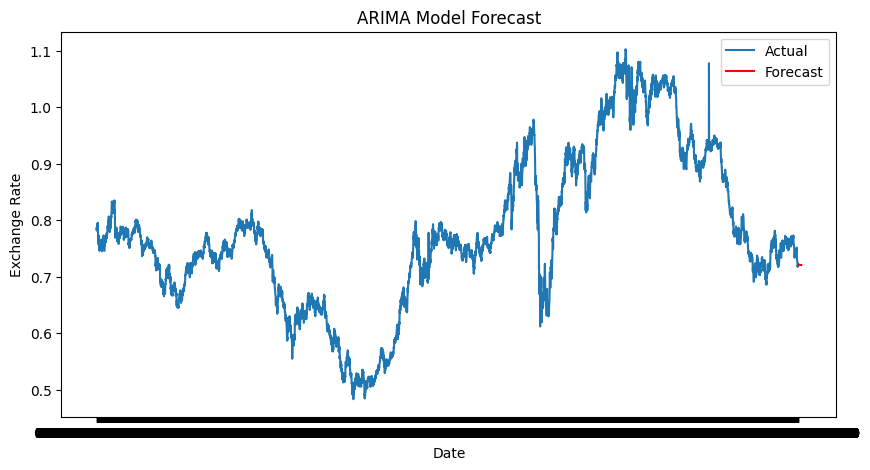

In [12]:
forecast = model_arima_fit.forecast(steps=30)
plt.figure(figsize=(10, 5))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [13]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model_es = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [14]:
model_es_fit = model_es.fit()

# Print summary of the model
print(model_es_fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77624.574
Trend:                         Additive   BIC                         -77513.625
Seasonal:                      Additive   AICC                        -77624.483
Seasonal Periods:                    12   Date:                 Wed, 03 Jul 2024
Box-Cox:                          False   Time:                         10:55:54
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8702071                alpha                 True
smoothing_trend          

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


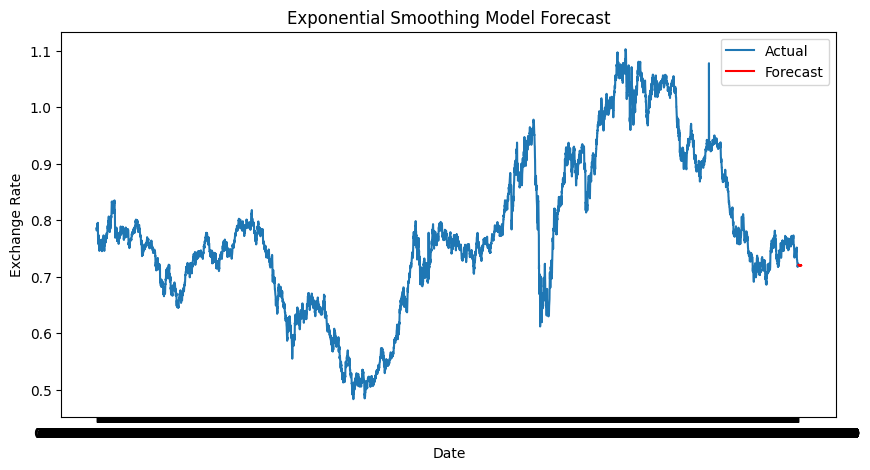

In [15]:
forecast_es = model_es_fit.forecast(steps=30)
plt.figure(figsize=(10, 5))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(forecast_es, label='Forecast', color='red')
plt.title('Exponential Smoothing Model Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [17]:
def compute_error_metrics(actual, forecast):
    mae = mean_absolute_error(actual, forecast)
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100
    return mae, rmse, mape

In [18]:
actual = df['Ex_rate'][-30:]

In [19]:
mae_arima, rmse_arima, mape_arima = compute_error_metrics(actual, forecast)
print(f'ARIMA - MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}')

ARIMA - MAE: 0.012724006489305202, RMSE: 0.016982710912755217, MAPE: nan


In [20]:
mae_es, rmse_es, mape_es = compute_error_metrics(actual, forecast_es)
print(f'Exponential Smoothing - MAE: {mae_es}, RMSE: {rmse_es}, MAPE: {mape_es}')

Exponential Smoothing - MAE: 0.013017654522635458, RMSE: 0.017245999955208903, MAPE: nan
